In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Upper Confidence Bound (UCB)

## Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Reinforcement Learning/Ads_CTR_Optimisation.csv')

## Implementing UCB

In [6]:
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0]*d
sums_of_rewards = [0]*d
total_reward = 0
for n in range(0, N):
  ad = 0
  max_upper_bound  = 0
  for i in range(0 , d):
    if (numbers_of_selections[i] > 0):
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1
  reward = df.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward = total_reward + reward

## Visualising the results

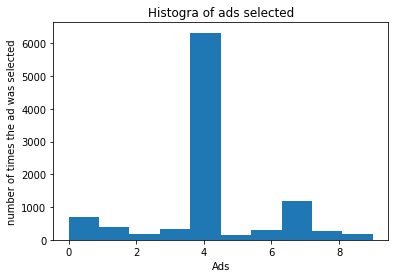

In [7]:
plt.hist(ads_selected)
plt.title('Histogra of ads selected')
plt.xlabel('Ads')
plt.ylabel('number of times the ad was selected')
plt.show()